In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
credit = pd.read_csv('./data/CreditSampleWindow.csv')

In [3]:
credit.shape

(1813157, 5)

In [4]:
credit.sample(10)

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
1729774,CID0267470,M3,M4,20170530.0,20170629.0
535323,CID0380338,,M0,20180101.0,20180104.0
636830,CID0282164,,M0,20170701.0,20170704.0
1689227,CID0034460,NaN,NaN,NaN,NaN
1174865,CID0169934,,M0,20180501.0,20180502.0
798692,CID0038295,,M0,20161101.0,20161102.0
148014,CID0277155,,M0,20171101.0,20171104.0
201628,CID0121081,,M0,20160201.0,20160202.0
1804440,CID0043829,M0,M1,20171104.0,20171105.0
665000,CID0366891,,M0,20180101.0,20180102.0


In [5]:
# CID: Customer ID
# STAGE_BEF: Pre-delinquency Stage of this stage
# STAGE_AFT: Delinquency Stage entered in this stage

In [6]:
credit.sort_values(['CID', 'START_DATE'])

,CID,STAGE_BEF,STAGE_AFT,START_DATE,CLOSE_DATE
737967,CID0000000,,M0,20160101.0,20160102.0
1102414,CID0000001,,M0,20151001.0,20151002.0
296136,CID0000001,,M0,20151201.0,20151202.0
315682,CID0000001,,M0,20160301.0,20160302.0
95915,CID0000001,,M0,20160501.0,20160504.0
...,...,...,...,...,...
514714,CID0388258,,M0,20180401.0,20180404.0
414846,CID0388258,M0,M1,20180404.0,20180419.0
1776798,CID0388258,,M0,20180501.0,20180504.0
1684205,CID0388258,M0,M1,20180504.0,20180531.0


**Define Observation Time Window**

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813157 entries, 0 to 1813156
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CID         object 
 1   STAGE_BEF   object 
 2   STAGE_AFT   object 
 3   START_DATE  float64
 4   CLOSE_DATE  float64
dtypes: float64(2), object(3)
memory usage: 69.2+ MB


In [8]:
credit['START_MON'] = credit['START_DATE'] // 100
credit['CLOSE_MON'] = credit['CLOSE_DATE'] // 100

In [9]:
credit_new = credit[['CID', 'STAGE_AFT', 'CLOSE_MON']].copy()

In [10]:
credit_new.isnull().sum()

CID               0
STAGE_AFT    149497
CLOSE_MON    149497
dtype: int64

In [11]:
credit_new.dropna(inplace=True)
credit_new.shape

(1663660, 3)

In [12]:
credit_new.duplicated().sum()

4788

In [13]:
credit_new.drop_duplicates(inplace=True)

In [14]:
credit_new.sort_values(by=['CID', 'CLOSE_MON', 'STAGE_AFT'], inplace=True)
credit_new

,CID,STAGE_AFT,CLOSE_MON
737967,CID0000000,M0,201601.0
1102414,CID0000001,M0,201510.0
296136,CID0000001,M0,201512.0
315682,CID0000001,M0,201603.0
95915,CID0000001,M0,201605.0
...,...,...,...
514714,CID0388258,M0,201804.0
414846,CID0388258,M1,201804.0
1776798,CID0388258,M0,201805.0
1684205,CID0388258,M1,201805.0


In [15]:
credit_a = credit_new.drop_duplicates(subset=['CID', 'CLOSE_MON'], keep='last')
credit_a

,CID,STAGE_AFT,CLOSE_MON
737967,CID0000000,M0,201601.0
1102414,CID0000001,M0,201510.0
296136,CID0000001,M0,201512.0
315682,CID0000001,M0,201603.0
293610,CID0000001,M1,201605.0
...,...,...,...
1507017,CID0388258,M1,201801.0
1167192,CID0388258,M1,201802.0
371941,CID0388258,M1,201803.0
414846,CID0388258,M1,201804.0


In [16]:
credit_a.loc[credit_a.CLOSE_MON == 0, 'CLOSE_MON'] = 201805
credit_a.head()

,CID,STAGE_AFT,CLOSE_MON
737967,CID0000000,M0,201601.0
1102414,CID0000001,M0,201510.0
296136,CID0000001,M0,201512.0
315682,CID0000001,M0,201603.0
293610,CID0000001,M1,201605.0


In [17]:
credit_a.duplicated().sum()

37

In [18]:
credit_a.sort_values(by=['CID', 'CLOSE_MON', 'STAGE_AFT'], inplace=True)

In [19]:
credit_a.duplicated(subset=['CID', 'CLOSE_MON']).sum()

12509

In [20]:
credit_a.drop_duplicates(subset=['CID', 'CLOSE_MON'], inplace=True)

In [21]:
credit_a.head()

,CID,STAGE_AFT,CLOSE_MON
737967,CID0000000,M0,201601.0
1102414,CID0000001,M0,201510.0
296136,CID0000001,M0,201512.0
315682,CID0000001,M0,201603.0
293610,CID0000001,M1,201605.0


In [22]:
credit_a['FLAG'] = credit_a.STAGE_AFT.map(lambda x: int(x[1]))
credit_a.drop(columns='STAGE_AFT',inplace=True)
credit_a.head()

,CID,CLOSE_MON,FLAG
737967,CID0000000,201601.0,0
1102414,CID0000001,201510.0,0
296136,CID0000001,201512.0,0
315682,CID0000001,201603.0,0
293610,CID0000001,201605.0,1


In [23]:
credit_a.shape

(1266325, 3)

**transition matrix**

In [24]:
credit_b = credit_a.set_index(keys=['CID', 'CLOSE_MON']).unstack()
credit_b.columns = credit_b.columns.droplevel()

In [ ]:
credit_b.to_excel('credit_b.xlsx')

In [25]:
import collections

In [26]:
def gen_matrix(df):
    counter = collections.Counter()
    
    for i, j in zip(df.columns[:-1], df.columns[1:]):
        data = df[[i, j]]
        data1 = data.dropna()
        data2 = [tuple(row) for row in data1.values.tolist()]
        counter += collections.Counter(data2)    
    
    mat = pd.DataFrame(data=np.zeros(shape=(10, 10)))
    
    for key, val in counter.items():
        mat.loc[key[0], key[1]] = val
    
    mat['count_all'] = mat.sum(axis=1)
    mat['count_bad'] = [mat.iloc[i, i+1:-1].sum() for i in mat.index]
    mat['to_bad'] = mat['count_bad'] / mat['count_all']
    
    return mat

In [27]:
gen_matrix(credit_b)

,0,1,2,3,4,5,6,7,8,9,count_all,count_bad,to_bad
0,220160.0,84137.0,11647.0,86.0,8.0,0.0,0.0,0.0,0.0,0.0,316038.0,95878.0,0.303375
1,68133.0,172110.0,20951.0,560.0,6.0,10.0,0.0,2.0,0.0,2.0,261774.0,21531.0,0.082250
2,1620.0,3788.0,150.0,23752.0,588.0,0.0,0.0,0.0,0.0,0.0,29898.0,24340.0,0.814101
3,543.0,1423.0,37.0,14.0,13784.0,2894.0,2.0,0.0,0.0,0.0,18697.0,16680.0,0.892122
4,3.0,12.0,1.0,0.0,0.0,15110.0,947.0,1.0,0.0,0.0,16074.0,16058.0,0.999005
5,0.0,4.0,0.0,0.0,0.0,0.0,17385.0,34.0,0.0,0.0,17423.0,17419.0,0.999770
6,2.0,10.0,2.0,10.0,0.0,10.0,34.0,15478.0,38.0,0.0,15584.0,15516.0,0.995637
7,2.0,2.0,0.0,0.0,0.0,2.0,4.0,2.0,12602.0,21.0,12635.0,12623.0,0.999050
8,0.0,12.0,4.0,0.0,4.0,8.0,12.0,22.0,55.0,192.0,309.0,192.0,0.621359
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


**Based on the transition matrix, it can be observed that the probability of customers who remain delinquent in the M2 stage continuing to be delinquent in the next phase increases significantly. Therefore, it is worth considering defining M2 as the default window.**

**Define the Performance Time Window**

In [28]:
first_use = pd.read_csv('./data/CreditFirstUse.csv')
first_use

,CID,FST_USE_DT
0,CID0092102,20161116
1,CID0111878,20161118
2,CID0264977,20161120
3,CID0059996,20160907
4,CID0057096,20160910
...,...,...
388254,CID0349633,20161207
388255,CID0010046,20161207
388256,CID0089903,20161202
388257,CID0165124,20161208


In [29]:
first_use['FST_USE_MON'] = first_use.FST_USE_DT // 100
first_use.head()

,CID,FST_USE_DT,FST_USE_MON
0,CID0092102,20161116,201611
1,CID0111878,20161118,201611
2,CID0264977,20161120,201611
3,CID0059996,20160907,201609
4,CID0057096,20160910,201609


In [30]:
credit_M2 = credit_a.loc[credit_a.FLAG >= 2].copy()
credit_M2

,CID,CLOSE_MON,FLAG
588141,CID0000013,201603.0,3
936245,CID0000013,201604.0,4
914463,CID0000013,201605.0,5
775260,CID0000013,201606.0,6
1177296,CID0000013,201607.0,7
...,...,...,...
145784,CID0388239,201707.0,7
1529758,CID0388239,201708.0,8
827295,CID0388239,201805.0,9
982139,CID0388249,201712.0,2


In [31]:
credit_M2_sort = credit_M2.sort_values(by=['CID','CLOSE_MON'])
credit_M2_sort.drop_duplicates(subset=['CID'], inplace=True)
credit_M2_sort

,CID,CLOSE_MON,FLAG
588141,CID0000013,201603.0,3
473987,CID0000018,201805.0,2
957639,CID0000019,201710.0,2
1411127,CID0000043,201710.0,2
1043978,CID0000046,201610.0,2
...,...,...,...
972571,CID0388175,201707.0,2
1047794,CID0388199,201704.0,2
105236,CID0388239,201703.0,2
982139,CID0388249,201712.0,2


In [32]:
credit_M2_merge = first_use.merge(credit_M2_sort, how='inner', on='CID')[['CID', 'FST_USE_MON', 'CLOSE_MON']]
credit_M2_merge

,CID,FST_USE_MON,CLOSE_MON
0,CID0082006,201609,201705.0
1,CID0383647,201609,201709.0
2,CID0006192,201610,201708.0
3,CID0348120,201611,201801.0
4,CID0155834,201611,201707.0
...,...,...,...
31383,CID0363951,201608,201707.0
31384,CID0232437,201608,201805.0
31385,CID0242433,201612,201801.0
31386,CID0118836,201612,201805.0


In [33]:
import datetime

fn = lambda x: datetime.datetime(int(x//100), int(x%100), 1)

credit_M2_merge['FST_USE_DT'] = credit_M2_merge.FST_USE_MON.map(fn)
credit_M2_merge['CLOSE_DT'] = credit_M2_merge.CLOSE_MON.map(fn)
credit_M2_merge['TIME_GAP']=(credit_M2_merge.CLOSE_DT - credit_M2_merge.FST_USE_DT).dt.days // 30
credit_M2_merge

,CID,FST_USE_MON,CLOSE_MON,FST_USE_DT,CLOSE_DT,TIME_GAP
0,CID0082006,201609,201705.0,2016-09-01,2017-05-01,8
1,CID0383647,201609,201709.0,2016-09-01,2017-09-01,12
2,CID0006192,201610,201708.0,2016-10-01,2017-08-01,10
3,CID0348120,201611,201801.0,2016-11-01,2018-01-01,14
4,CID0155834,201611,201707.0,2016-11-01,2017-07-01,8
...,...,...,...,...,...,...
31383,CID0363951,201608,201707.0,2016-08-01,2017-07-01,11
31384,CID0232437,201608,201805.0,2016-08-01,2018-05-01,21
31385,CID0242433,201612,201801.0,2016-12-01,2018-01-01,13
31386,CID0118836,201612,201805.0,2016-12-01,2018-05-01,17


<AxesSubplot:>

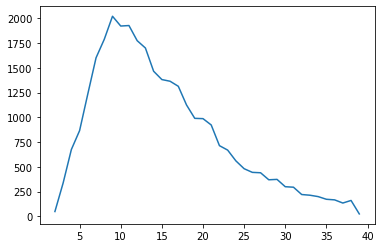

In [34]:
M2_merge = credit_M2_merge.loc[credit_M2_merge.TIME_GAP > 1].copy()
M2_merge.TIME_GAP.value_counts().sort_index().plot()

<AxesSubplot:>

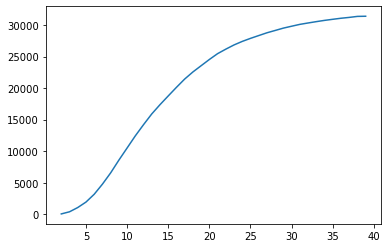

In [35]:
M2_merge.TIME_GAP.value_counts().sort_index().cumsum().plot()

**Build a Model**

In [36]:
raw_data = pd.read_csv('./data/cs-training.csv', index_col=0)
raw_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [37]:
raw_data.SeriousDlqin2yrs.value_counts()
# 1: default

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [38]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [39]:
raw_data.describe([.1, .9, .99]).T

,count,mean,std,min,10%,50%,90%,99%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.002969,0.154181,0.981278,1.092956,50708.0
age,150000.0,52.295207,14.771866,0.0,33.000000,52.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.030874,0.366508,1267.000000,4979.040000,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,2005.000000,5400.000000,11666.000000,25000.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,3.000000,8.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,2.000000,98.0


In [40]:
raw_data.duplicated().sum()

609

In [41]:
raw_data.drop_duplicates(inplace=True)

In [42]:
import missingno

<AxesSubplot:>

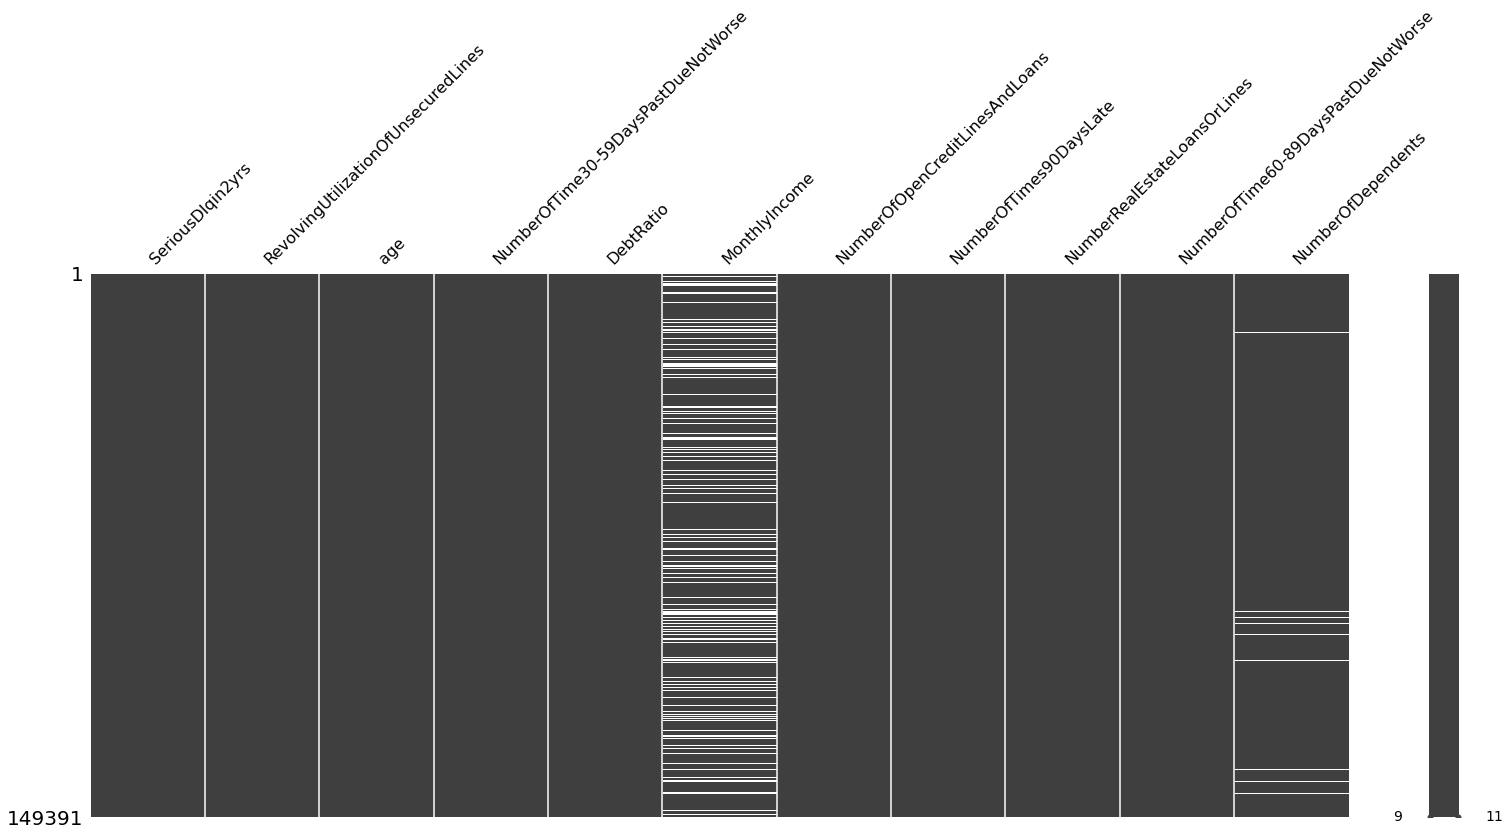

In [43]:
missingno.matrix(raw_data)

In [44]:
raw_data.MonthlyIncome.value_counts()
raw_data.MonthlyIncome.fillna(raw_data.MonthlyIncome.median(), inplace=True)

In [45]:
raw_data.NumberOfDependents.value_counts()
raw_data.NumberOfDependents.fillna(0, inplace=True)

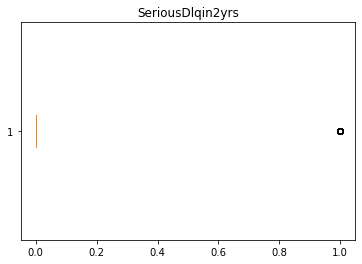

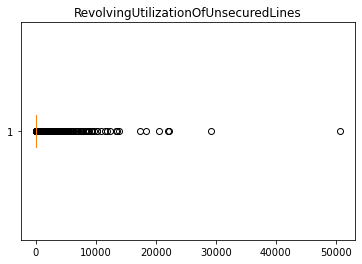

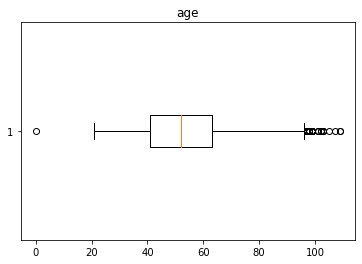

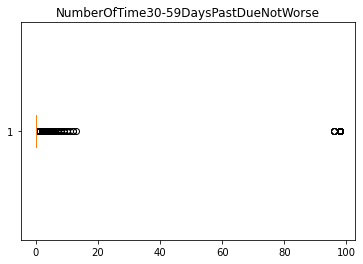

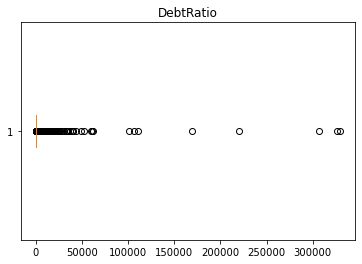

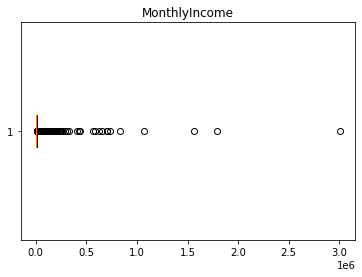

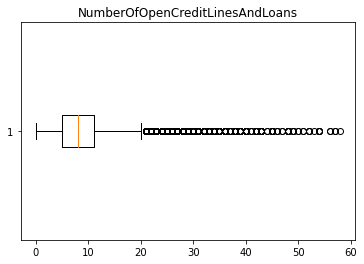

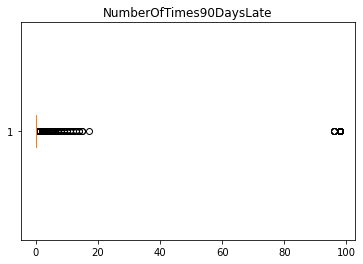

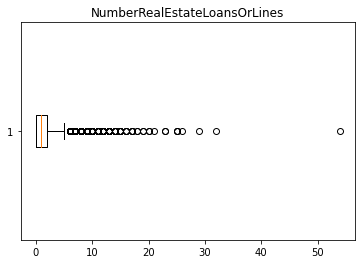

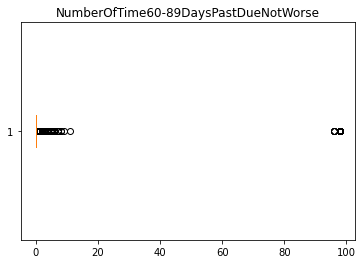

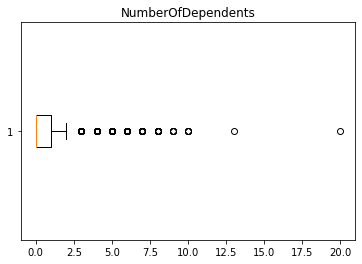

In [46]:
for col in raw_data.columns:
    plt.boxplot(x=raw_data[col], vert=False)
    plt.title(col)
    plt.show()

In [47]:
thred_dict = {
    'RevolvingUtilizationOfUnsecuredLines': 1,
    'age': 80,
    'NumberOfTime30-59DaysPastDueNotWorse': 20,
    'DebtRatio': 100,
    'NumberOfOpenCreditLinesAndLoans': 30,
    'NumberOfTimes90DaysLate': 20,
    'NumberRealEstateLoansOrLines':20,
    'NumberOfTime60-89DaysPastDueNotWorse': 20,
    'NumberOfDependents': 10
}

In [48]:
thred_series = pd.Series(thred_dict)
cond = (raw_data > thred_series).any(axis=1)
training_a = raw_data[~cond].copy()
training_a.shape

(117383, 11)

In [49]:
training_a.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,117383.0,0.062368,0.241825,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,117383.0,0.314222,0.337755,0.0,0.032515,0.162497,0.541457,1.0
age,117383.0,50.943442,13.696448,0.0,41.000000,51.000000,61.000000,80.0
NumberOfTime30-59DaysPastDueNotWorse,117383.0,0.239225,0.681038,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,117383.0,1.823449,9.005986,0.0,0.151570,0.305924,0.503299,100.0
MonthlyIncome,117383.0,6771.802186,14344.109289,0.0,3600.000000,5400.000000,8200.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,117383.0,8.580246,5.009993,0.0,5.000000,8.000000,11.000000,30.0
NumberOfTimes90DaysLate,117383.0,0.080591,0.445163,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,117383.0,1.030098,1.114413,0.0,0.000000,1.000000,2.000000,20.0
NumberOfTime60-89DaysPastDueNotWorse,117383.0,0.058518,0.307137,0.0,0.000000,0.000000,0.000000,11.0


In [50]:
training = training_a[training_a.age >= 18].copy()
training

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [51]:
data = training.iloc[:, 1:].copy()
target = training.SeriousDlqin2yrs

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
x_train.shape, x_test.shape

((93905, 10), (23477, 10))

**Binning and WOE** 

In [54]:
%run ./auto_bin.py

In [55]:
frame = pd.concat((x_train, y_train), axis=1)
frame

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
104764,0.574890,55,0,0.384903,6146.0,9,0,1,0,1.0,0
120771,0.022425,68,0,0.007492,2535.0,3,0,0,0,0.0,0
37911,0.361361,37,0,0.423166,6500.0,13,0,1,0,1.0,0
31120,0.201229,57,1,0.246078,8350.0,15,0,1,0,1.0,0
140882,0.241869,33,0,0.195393,5035.0,6,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
131665,0.000000,30,0,0.040123,7800.0,5,0,0,0,3.0,0
91603,0.816819,57,0,0.419829,4558.0,8,0,1,0,1.0,1
104073,0.012850,41,0,0.030488,3935.0,3,0,0,0,0.0,0
26625,0.979099,39,0,1.206598,3000.0,6,0,1,0,0.0,0


In [56]:
ab = AutoBins(frame=frame, y='SeriousDlqin2yrs')
ab.auto_bins('age')

Performing binning on the age column : 
Number of groups: 19 	iv: 0.20163166096304094
Number of groups: 18 	iv: 0.20160951703587232
Number of groups: 17 	iv: 0.20159985375013678
Number of groups: 16 	iv: 0.20154325018651043
Number of groups: 15 	iv: 0.20147967634045957
Number of groups: 14 	iv: 0.20137097615954755
Number of groups: 13 	iv: 0.2012639350556744
Number of groups: 12 	iv: 0.20108679835809484
Number of groups: 11 	iv: 0.2005919663916087
Number of groups: 10 	iv: 0.19973731515439716
Number of groups: 09 	iv: 0.19918882155441517
Number of groups: 08 	iv: 0.19850464768309106
Number of groups: 07 	iv: 0.1978545936013265
Number of groups: 06 	iv: 0.19467747171523392
Number of groups: 05 	iv: 0.1925367332455068
Number of groups: 04 	iv: 0.18959224488357546
Number of groups: 03 	iv: 0.17742854194530733
Number of groups: 02 	iv: 0.15005671044956428

Binning result: 
Number of groups: 02 	iv: 0.15005671044956428

The WOE of groups：
    min   max  count_0  count_1  total  percentage  

([(-inf, 55.0, 53359, 4510), (55.0, inf, 34779, 1257)],
     min   max  count_0  count_1  total  percentage  bad_rate       woe
 0  -inf  55.0    53359     4510  57869     0.61625  0.077935 -0.256006
 1  55.0   inf    34779     1257  36036     0.38375  0.034882  0.593534,
 0.15005671044956428)

In [57]:
for col in x_train.columns:
    ab.auto_bins(col)
    print('-' * 50)

Performing binning on the RevolvingUtilizationOfUnsecuredLines column : 
Number of groups: 18 	iv: 0.9351462449465289
Number of groups: 17 	iv: 0.9351265279896294
Number of groups: 16 	iv: 0.9350769104136236
Number of groups: 15 	iv: 0.9347239037083651
Number of groups: 14 	iv: 0.9344872241384897
Number of groups: 13 	iv: 0.9336916935340533
Number of groups: 12 	iv: 0.9330059813925827
Number of groups: 11 	iv: 0.9321179354290324
Number of groups: 10 	iv: 0.9282862927309191
Number of groups: 09 	iv: 0.9264212647645622
Number of groups: 08 	iv: 0.9240526027948683
Number of groups: 07 	iv: 0.9176101784661446
Number of groups: 06 	iv: 0.9055661157236445
Number of groups: 05 	iv: 0.8952375879209533
Number of groups: 04 	iv: 0.8684114503804337
Number of groups: 03 	iv: 0.8427875584172875
Number of groups: 02 	iv: 0.6594137843980208

Binning result: 
Number of groups: 02 	iv: 0.6594137843980208

The WOE of groups：
        min       max  count_0  count_1  total  percentage  bad_rate       woe


In [58]:
bins_dict = {
    'RevolvingUtilizationOfUnsecuredLines': 2,
    'age': 6,
    'NumberOfTime30-59DaysPastDueNotWorse': 2,
    'DebtRatio': 8,
    'MonthlyIncome': 4,
    'NumberOfOpenCreditLinesAndLoans': 6,
    'NumberOfTimes90DaysLate': 2,
    'NumberRealEstateLoansOrLines': 3,
    'NumberOfTime60-89DaysPastDueNotWorse': 2,
    'NumberOfDependents': 3
}

In [59]:
woe_dict = {}
iv_dict = {}

for col in x_train.columns:
    num_bins, woe, iv = ab.auto_bins(col, n=bins_dict[col], show_iv=False)
    woe_dict[col] = woe
    iv_dict[col] = iv

<AxesSubplot:>

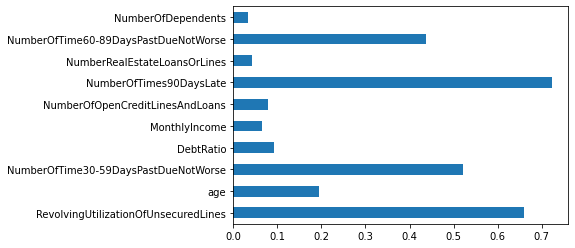

In [60]:
pd.Series(iv_dict).plot.barh()

In [61]:
x_train_a = x_train[pd.Series(iv_dict)[pd.Series(iv_dict) >= 0.1].index].copy()
x_test_a = x_test[ pd.Series(iv_dict)[pd.Series(iv_dict) >= 0.1].index].copy()

In [62]:
x_train_a.shape

(93905, 5)

In [63]:
woe_dict['age']

,min,max,count_0,count_1,total,percentage,bad_rate,woe
0,-inf,29.0,5183,588,5771,0.061456,0.101889,-0.550339
1,29.0,43.0,21714,1983,23697,0.252351,0.083681,-0.333405
2,43.0,55.0,26462,1939,28401,0.302444,0.068272,-0.113214
3,55.0,59.0,8174,432,8606,0.091646,0.050198,0.213536
4,59.0,63.0,8430,354,8784,0.093541,0.040301,0.443503
5,63.0,inf,18175,471,18646,0.198562,0.025260,0.926192


In [64]:
def woe_replace(df):
    df = df.copy()
    for col in df.columns:
        bins = [-np.inf] + woe_dict[col]['max'].tolist()
        labels = woe_dict[col]['woe'].tolist()
        df[col] = pd.cut(x=df[col], bins=bins, labels=labels)
    return df

In [65]:
x_train_woe = woe_replace(x_train_a)

In [66]:
x_test_woe = woe_replace(x_test_a)

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smote = SMOTE()

In [69]:
x_train_smote, y_train_smote = smote.fit_resample(x_train_woe, y_train)

In [70]:
cond = x_train_smote.isnull().any(axis=1)
x_train_smote2 = x_train_smote.loc[~cond].copy()
y_train_smote2 = y_train_smote.loc[~cond].copy()

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()
lr.fit(x_train_smote2, y_train_smote2)

LogisticRegression()

In [73]:
lr.score(x_test_woe, y_test)

0.7710525194871577

In [74]:
from sklearn.metrics import roc_curve, auc

In [75]:
y_proba = lr.predict_proba(x_test_woe)
y_score = y_proba[:, -1]
fpr, tpr, _ = roc_curve(y_test, y_score)

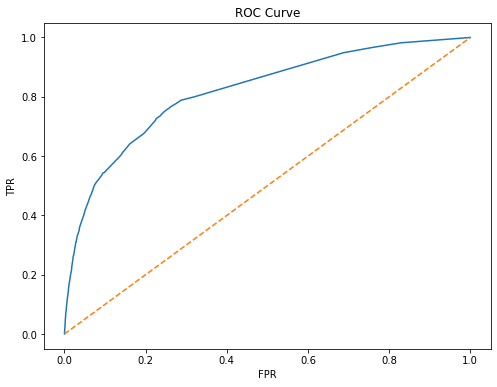

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], [0, 1], ls='--')

In [77]:
auc(fpr, tpr)

0.8179004279104631

In [79]:
x_train_smote.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

**Score**

In [80]:
odds = 1/60
P0 = 600
PDO = 20

B = PDO / np.log(2)
A = P0 + B * np.log(odds)

In [81]:
basic_score = A - B * lr.intercept_[0]
basic_score

481.1783273722227

In [82]:
woe_dict['age']

,min,max,count_0,count_1,total,percentage,bad_rate,woe
0,-inf,29.0,5183,588,5771,0.061456,0.101889,-0.550339
1,29.0,43.0,21714,1983,23697,0.252351,0.083681,-0.333405
2,43.0,55.0,26462,1939,28401,0.302444,0.068272,-0.113214
3,55.0,59.0,8174,432,8606,0.091646,0.050198,0.213536
4,59.0,63.0,8430,354,8784,0.093541,0.040301,0.443503
5,63.0,inf,18175,471,18646,0.198562,0.025260,0.926192


In [79]:
feature_coef = {}
for i in range(len(x_train_smote2.columns)):
    feature_coef[x_train_smote2.columns[i]] = lr.coef_[0][i]
feature_coef

{'RevolvingUtilizationOfUnsecuredLines': -0.6950685518397075,
 'age': -0.7297776076320098,
 'NumberOfTime30-59DaysPastDueNotWorse': -0.6792855832905025,
 'DebtRatio': -0.9294654139894288,
 'NumberOfTimes90DaysLate': -0.6496774538915759,
 'NumberOfTime60-89DaysPastDueNotWorse': -0.4547015245328053}

In [81]:
with open('score.csv', 'w', encoding='utf_8') as fp:
    fp.write(f'basic_score: {basic_score} \n\n')

In [82]:
for feature in feature_coef:
    coef = feature_coef[feature]
    woe_df = woe_dict[feature]
    
    score = woe_df['woe'] * (-B * coef)
    score.name = feature
    score.index = [(np.round(woe_df.loc[i, 'min'], 2),
                    np.round(woe_df.loc[i, 'max'], 2)) 
                    for i in woe_df.index]
    
    with open('score.txt', 'a', encoding='utf-8') as fp:
        fp.write(f' {str(score)} \n\n')